In [336]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import solve_triangular

# Question 3:
The asymptotic complexity of the given algorithm is $\mathcal{O}(n^3)$ because we have n iterations, and within each iteration we need to find the pivot (which takes $n - j$ per iteration), swap the rows of L, U, and P (though for L we may not need to swap as per question 2) and this culminates in scalar subtracting one row from the kth row in U (again $n - j$). In total this is $\mathcal{O}(n^3)$. 


In [337]:
def LU_Decomp(A):
    n = len(A)
    U = A.copy()
    L = np.eye(n)
    P = np.eye(n)
    for j in range(n-1):
        i = np.argmax(np.abs(U[j:n, j])) + j
        if i != j:
            U[[i, j], j:n] = U[[j, i], j:n]
            P[[i, j], :] = P[[j, i], :]
            for k in range(j+1, n):
                L[k, j] = U[k, j]/U[j, j]
                U[k, j:] = U[k, j:] - L[k, j]*U[j, j:]
    return U, L, P


For L we can just forward substitute because the first element is 1 (unit L) and therefore we get the first element of c automatically, allowing us to cascade the rest from the lower triangular structure:

For U we need to divide since it's not unit U.

In [338]:
def Lsolve(L, c, n):
    y = np.zeros(n)
    y[0] = c[0]
    for i in range(len(L)-1):
        y[i+1] = c[i+1] - np.dot(L[i+1, 0:i], y[0:i])
    return y

def Usolve(U, d, n):
    z = np.zeros(n)
    z[0] = np.divide(d[0],U[0, 0])
    for j in range(len(U)-1):
        z[j+1] = np.divide((d[j+1] - np.dot(U[j+1, 0:j], z[0:j])), (U[j+1, j+1]))
    return z 

In [341]:
import time
n_arr = [10, 30, 100, 300, 1000, 3000, 10000]

def t(n_arr):
    ends = np.zeros(len(n_arr))
    end_s = np.zeros(len(n_arr))
    
    for i in range(len(n_arr)):
        n = n_arr[i]
        A = np.random.randn(n, n)
        b = np.random.randn(n) 
        
        start = time.time()
        U, L, P = LU_Decomp(A)
        y = Lsolve(L, b, n)
        z = Usolve(U, b, n)
        ends[i] = time.time() - start
        
        start_ = time.time()
        Ptrue, Ltrue, Utrue = scipy.linalg.lu(A)
        ytrue = scipy.linalg.solve_triangular(Ltrue, b, lower = True)
        ztrue = scipy.linalg.solve_triangular(Utrue, b)
        end_s[i] = time.time() - start_
        
    return ends, end_s
ends, end_s = t(n_arr)

[9.97304916e-04 4.41026688e-03 2.52916813e-02 1.90127611e-01
 2.20229840e+00 2.91902628e+01 6.34810669e+02]


In [257]:
U, L, P = LU_Decomp(A)

In [258]:
Ptrue, Ltrue, Utrue = scipy.linalg.lu(A)


In [270]:
start = time.time()
U, L, P = LU_Decomp(A)
y = Lsolve(L, b, n)
z = Usolve(U, b, n)
end = time.time() - start
print(end)

645.137647151947


In [272]:
start_ = time.time()
Ptrue, Ltrue, Utrue = scipy.linalg.lu(A)
ytrue = scipy.linalg.solve_triangular(Ltrue, b, lower = True)
ztrue = scipy.linalg.solve_triangular(Utrue, b)
end_ = time.time() - start_
print(end_)

12.964760541915894


Text(0, 0.5, 'time')

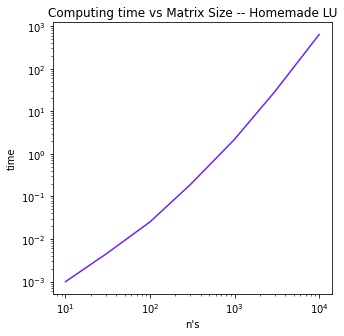

In [343]:
plt.figure(figsize = (5, 5))
plt.loglog(n_arr, ends, c = "#6D21FF", label = "logplot")
plt.title("Computing time vs Matrix Size -- Homemade LU")
plt.xlabel("n's")
plt.ylabel("time")

Text(0, 0.5, 'time')

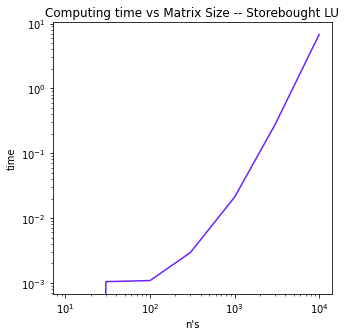

In [342]:
plt.figure(figsize = (5, 5))
plt.loglog(n_arr, end_s, c = "#6D21FF", label = "logplot")
plt.title("Computing time vs Matrix Size -- Storebought LU")
plt.xlabel("n's")
plt.ylabel("time")

I observe that they are both exponential, but I assume that the library version has several almost instantaneous outputs because it runs in C or Fortran and is a whole lot quicker (like most library ops.) In fact this is really clear when you look at the runtime length difference between the two graphs -- the storebought only ever reaches ~ $10$ whereas my homemade concoction took ~ $10^3$ and it's not nearly as pretty or effective. Unfortunately these are trying times, and people like I have to get by on a patchwork LU factorization every so often.


I should also mention I am very sorry for never commenting my code -- it comes from the fact that I run each cell about 300 to 400 times and I frequently delete and start fresh, so I never really have a good idea of what to write in a comment.